In [1]:
# ---
# Title: Wiremind Technical Test - Part 1 : Exploratory Data Analysis
# Author: Ahmed Hattali
# Date: 26-07-2025
# ---

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


### 1. LOAD AND PREPARE DATA

In [2]:
# Data directory, please change this to your own directory where the data is stored.
data_dir = 'data'

In [3]:
# Load datasets
train = pd.read_parquet(os.path.join(data_dir, 'cayzn_train.parquet'))
test = pd.read_parquet(os.path.join(data_dir, 'cayzn_test.parquet'))

In [4]:
# checking datasets shapes
print(f"Train shape: {train.shape} | Test shape: {test.shape}")

Train shape: (632841, 30) | Test shape: (32565, 30)


In [5]:
# converting date columns to datetime format
train['departure_date'] = pd.to_datetime(train['departure_date'])
train['sale_date'] = pd.to_datetime(train['sale_date'])

# adding a route o->d columns for easier analysis
train['route'] = list(zip(train['origin_station_name'], train['destination_station_name']))

In [6]:
# data structure summary
structure = pd.DataFrame({
    'Column': train.columns,
    'Type': train.dtypes.values,
    'Non_Null': train.notnull().sum().values,
    'Null%': train.isnull().mean().values * 100,
    'Uniques': train.nunique().values,
    'Sample': [train[c].iloc[0] for c in train.columns]
})
display(structure)

,Column,Type,Non_Null,Null%,Uniques,Sample
0,demand,int64,632841,0.0,135,1
1,departure_date,datetime64[ns],632841,0.0,424,2019-03-01 00:00:00
2,destination_current_public_holiday,int64,632841,0.0,1,0
3,destination_current_school_holiday,int64,632841,0.0,2,1
4,destination_days_to_next_public_holiday,int64,632841,0.0,78,52
5,destination_days_to_next_school_holiday,int64,632841,0.0,133,-13
6,destination_station_name,object,632841,0.0,6,ag
7,od_destination_time,int64,632841,0.0,118,1088
8,od_number_of_similar_12_hours,int64,632841,0.0,12,5
9,od_number_of_similar_2_hours,int64,632841,0.0,6,1


All columns are clean, null rates are minimal, and key features are well-defined for model training.

### 3. DEMAND / TARGET VARIABLE ANALYSIS


Demand variable statistics:
count    632841.000
mean          3.000
std           7.257
min           0.000
50%           0.000
75%           3.000
95%          16.000
99%          35.000
max         192.000
Name: demand, dtype: float64


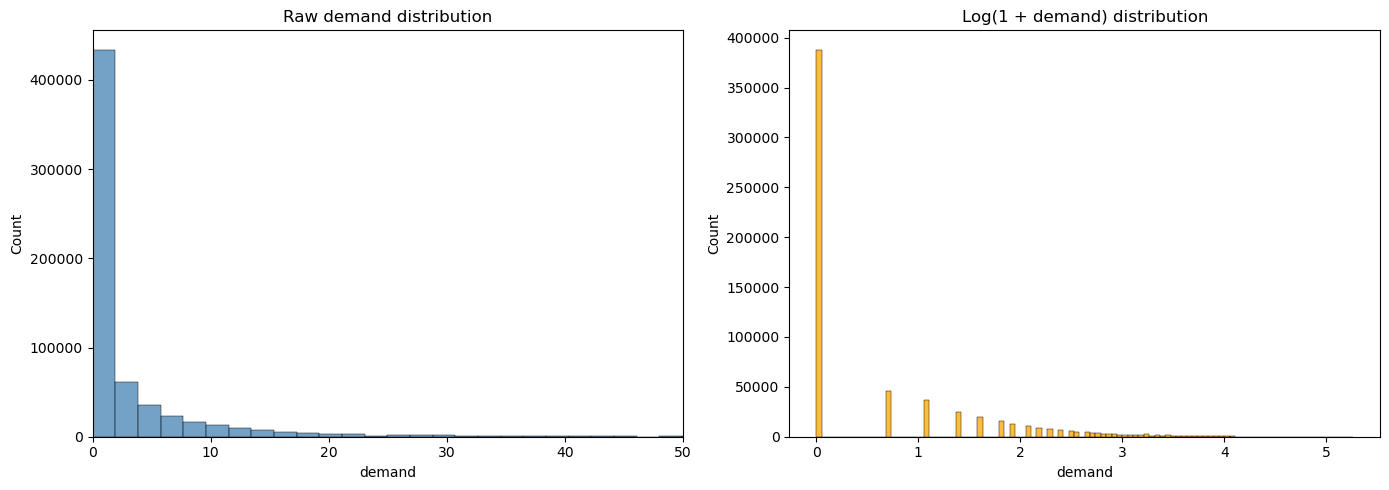

In [7]:

demand = train['demand']
print("\nDemand variable statistics:")
print(demand.describe(percentiles=[.5, .75, .95, .99]).round(3))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(demand, bins=100, ax=axes[0], color='steelblue')
axes[0].set_title("Raw demand distribution")
axes[0].set_xlim(0, 50)
sns.histplot(np.log1p(demand), bins=100, ax=axes[1], color='orange')
axes[1].set_title("Log(1 + demand) distribution")
plt.tight_layout()
plt.show()

**The demand variable** exhibits a **highly right-skewed distribution**, with a **median and lower quartile of zero**, indicating that **more than half** of the observations correspond to **no demand.**

Despite a relatively low **mean** of 3, the presence of extreme values—reaching **up to 192**, along with a **high standard deviation reflects substantial variability**. The concentration of values near zero combined with a long tail of high-demand instances highlights a strong imbalance and the presence of rare but significant peaks in demand.

### FEATURES ANALYSIS

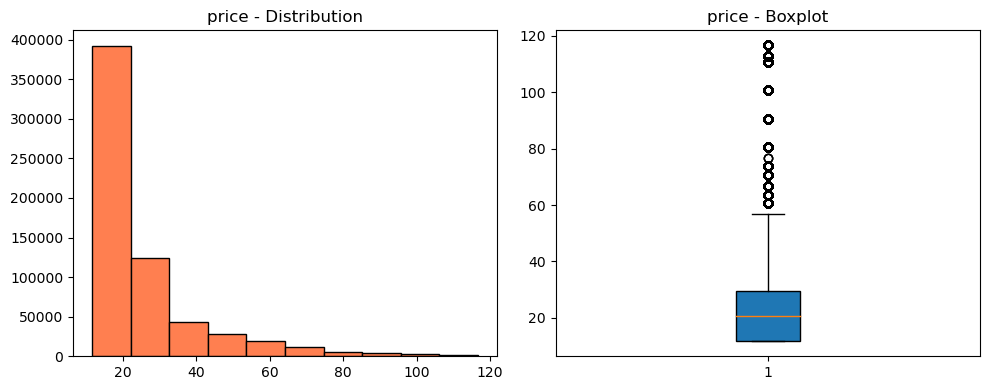

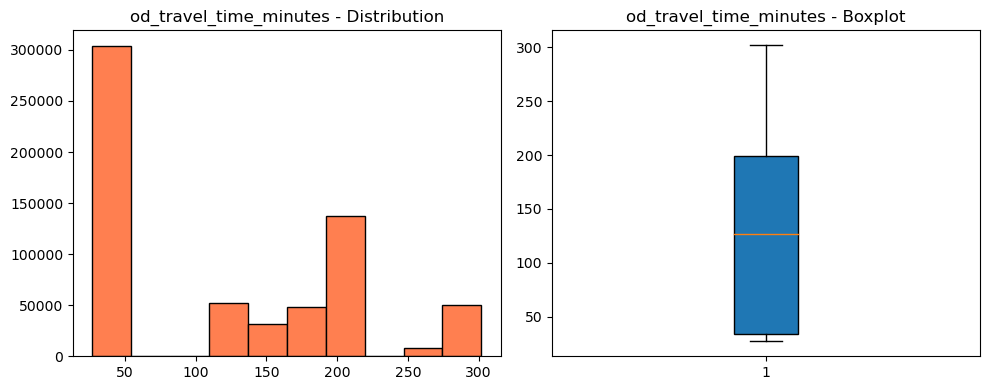

In [8]:
# distributions of price and travel time, 2 very important numerical features in our dataset
for feat in ['price', 'od_travel_time_minutes']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].hist(train[feat].dropna(), bins=10, color='coral', edgecolor='k')
    axes[0].set_title(f'{feat} - Distribution')
    axes[1].boxplot(train[feat].dropna(), patch_artist=True)
    axes[1].set_title(f'{feat} - Boxplot')
    plt.tight_layout()
    plt.show()

- **The price plots** shows a **highly right-skewed distribution**, with most values concentrated at the lower end and a long tail of higher prices. This is confirmed by the boxplot, which highlights many high-value outliers and indicates that there are expensive tickets that are significantly above the typical range.

- **The travel time plots** show that there are more short trips, around 30–50 minutes. There are also quite a few trips that take a medium amount of time, between about 1h30 and 3h30. However, only a small number of trips take a really long time, up to 300 minutes.

In [9]:
# Categorical features
cat = train.select_dtypes('object')
cat_summary = cat.agg(['nunique', lambda s: s.mode()[0], lambda s: s.value_counts().iloc[0]])
cat_summary.index = ['Uniques', 'Most Frequent', 'Count']
display(cat_summary.T)

,Uniques,Most Frequent,Count
destination_station_name,6,bb,260429
origin_station_name,6,bb,184808
route,8,"(cgm, bb)",179872


In this data we only have the station names (as origin and destination) as a categorical features.

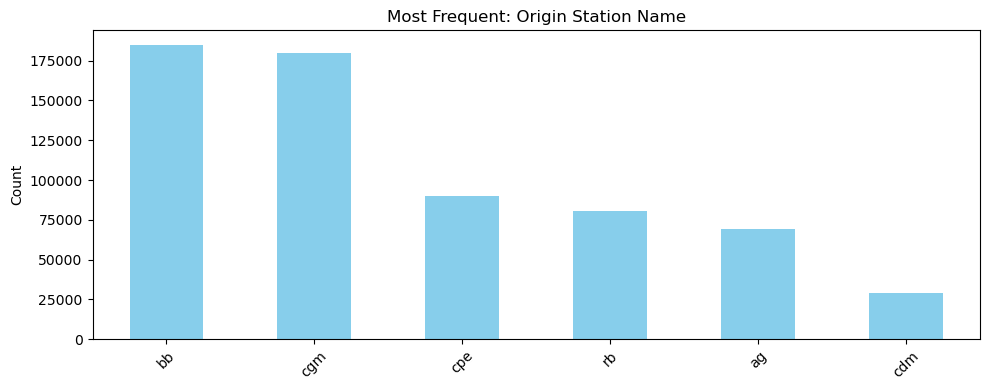

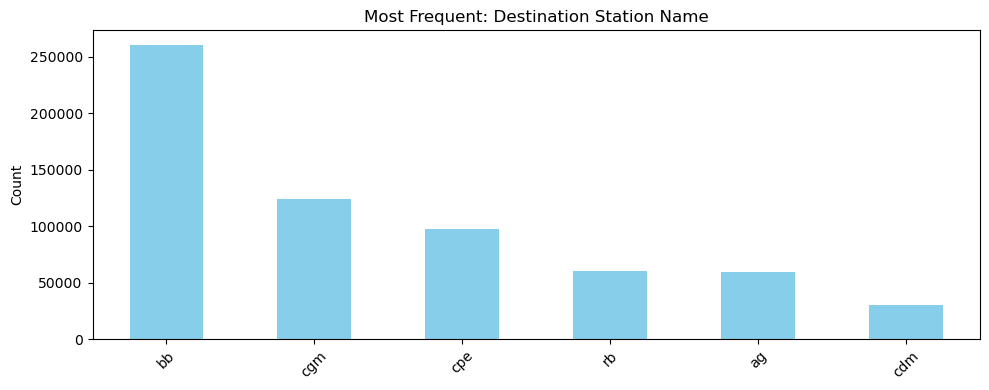

In [10]:
for col in ['origin_station_name', 'destination_station_name']:
    top = train[col].value_counts().head(10)
    plt.figure(figsize=(10,4))
    top.plot(kind='bar', color='skyblue')
    plt.title(f'Most Frequent: {col.replace("_", " ").title()}')
    plt.ylabel('Count') 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

There are only six unique stations for both **origin** and **destination**, but **one station** in particular, labeled **“bb”** shows up a lot—over **40%** of the time as a destination and nearly **30%** as an origin. This suggests “bb” is a major hub in the network.

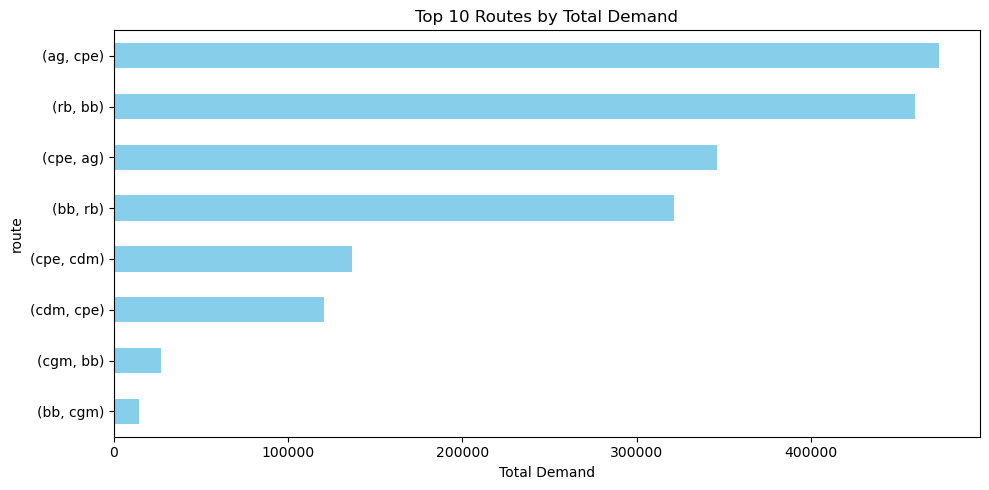

In [11]:
top_routes = train.groupby('route')['demand'].sum()

# Plot
plt.figure(figsize=(10, 5))
top_routes.sort_values().plot.barh(color='skyblue')
plt.xlabel('Total Demand')
plt.title('Top 10 Routes by Total Demand')
plt.tight_layout()
plt.show()

This chart shows train routes with the highest total demand. 

The majority of trips are concentrated on just a few key routes, especially "**ag → cpe**" and "**rb → bb**" which see much more demand than the others. 

**Demand drops** after the top few routes, and **some routes have much more traffic in one direction than the other**.

### TEMPORAL PATTERNS

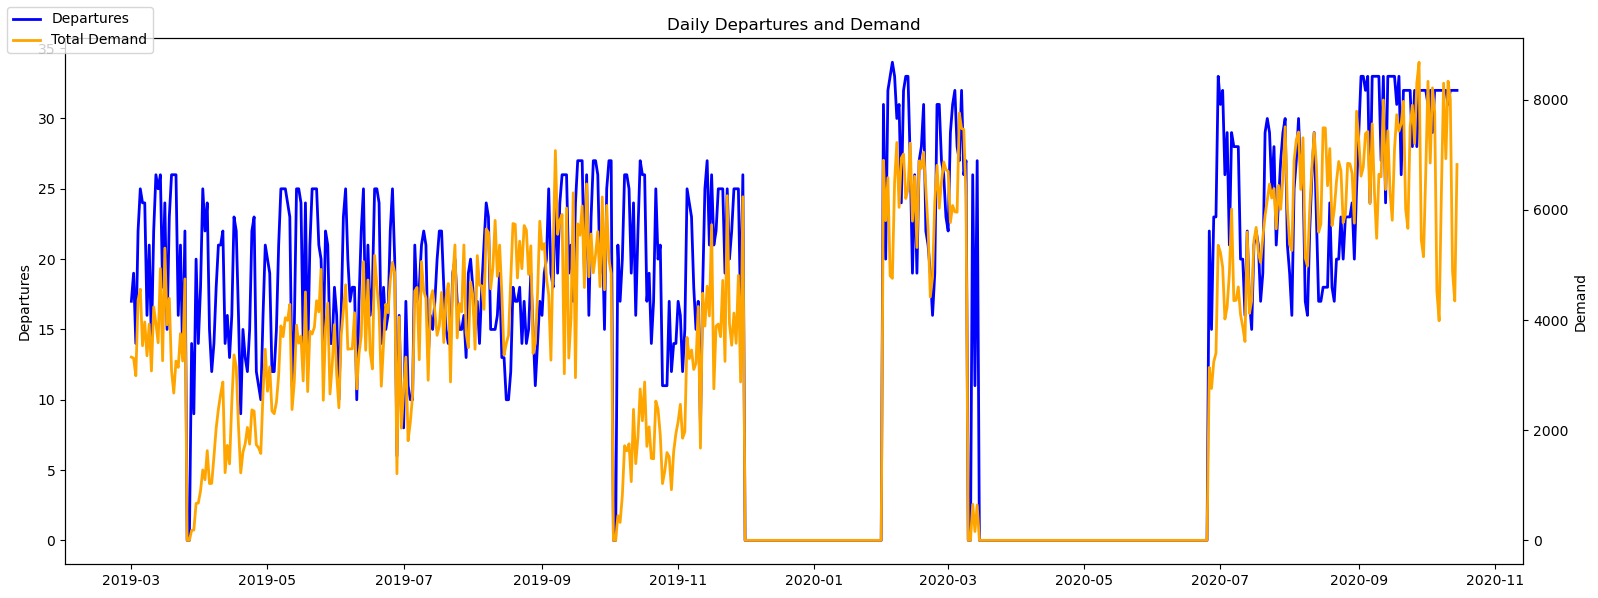

In [12]:
# Daily departures and demand
departures = train.drop_duplicates(['departure_date','route','od_origin_time'])
dep_per_day = departures['departure_date'].value_counts().sort_index()
total_demand = train.groupby('departure_date')['demand'].sum().sort_index()
full_range = pd.date_range(dep_per_day.index.min(), dep_per_day.index.max(), freq='D')
dep_per_day = dep_per_day.reindex(full_range, fill_value=0)
total_demand = total_demand.reindex(full_range, fill_value=0)

fig, ax1 = plt.subplots(figsize=(16,6))
ax1.plot(dep_per_day, label='Departures', color='blue', lw=2)
ax2 = ax1.twinx()
ax2.plot(total_demand, label='Total Demand', color='orange', lw=2)
ax1.set_ylabel('Departures'); ax2.set_ylabel('Demand')
plt.title('Daily Departures and Demand')
fig.legend(loc='upper left')
plt.tight_layout()
plt.show()

**The chart above shows daily train departures over time.**

We can see that there's a consistent and regular flow of departures until **early 2020**, when we suddenly see a **significant data gap**, coinciding with the onset of the **COVID-19 pandemic**. This gap likely reflects not just a sharp drop in train activity, but a complete absence of records during that time, either because trains weren’t operating or because the data wasn’t collected. It could also represent a unique, one-off situation with patterns that differ greatly from normal operations—making it less relevant for predicting future behavior in typical conditions. After this period, the data returns, suggesting a slow recovery and resumption of regular train services.


**If we compare the daily train departures (blue) with total passenger demand (orange) over time.** Overall, the two lines **generally move together**, higher departures often correspond to higher demand.

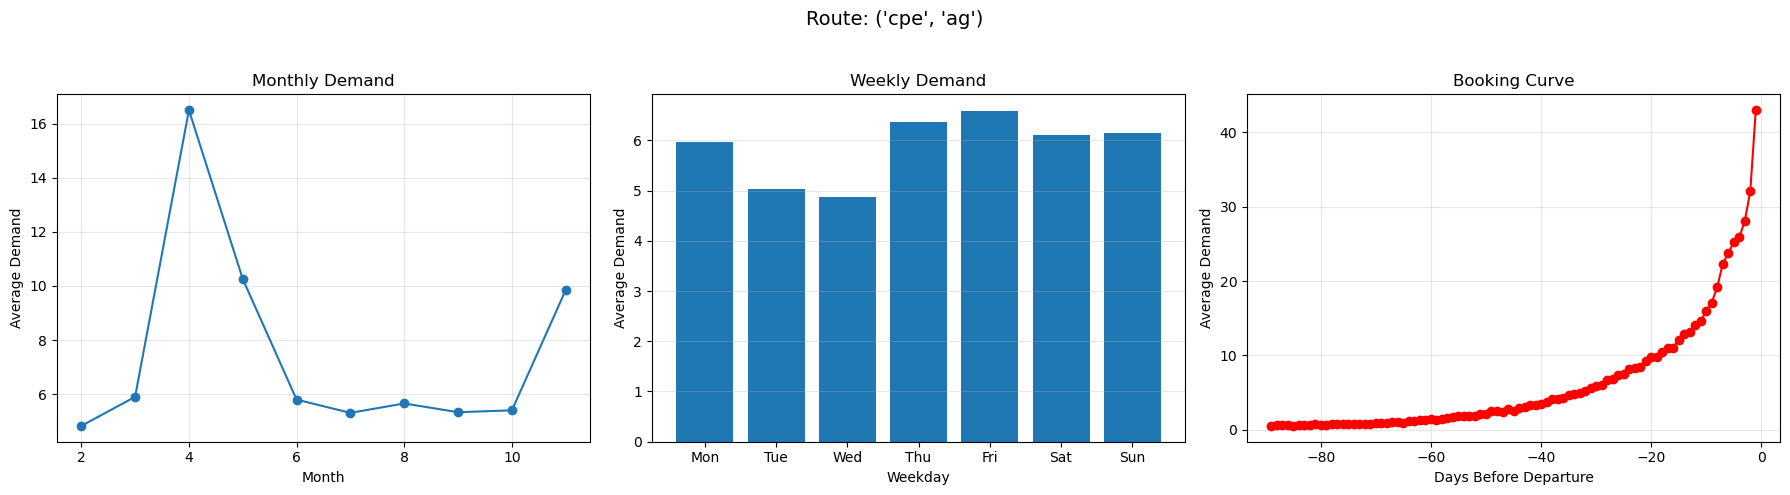

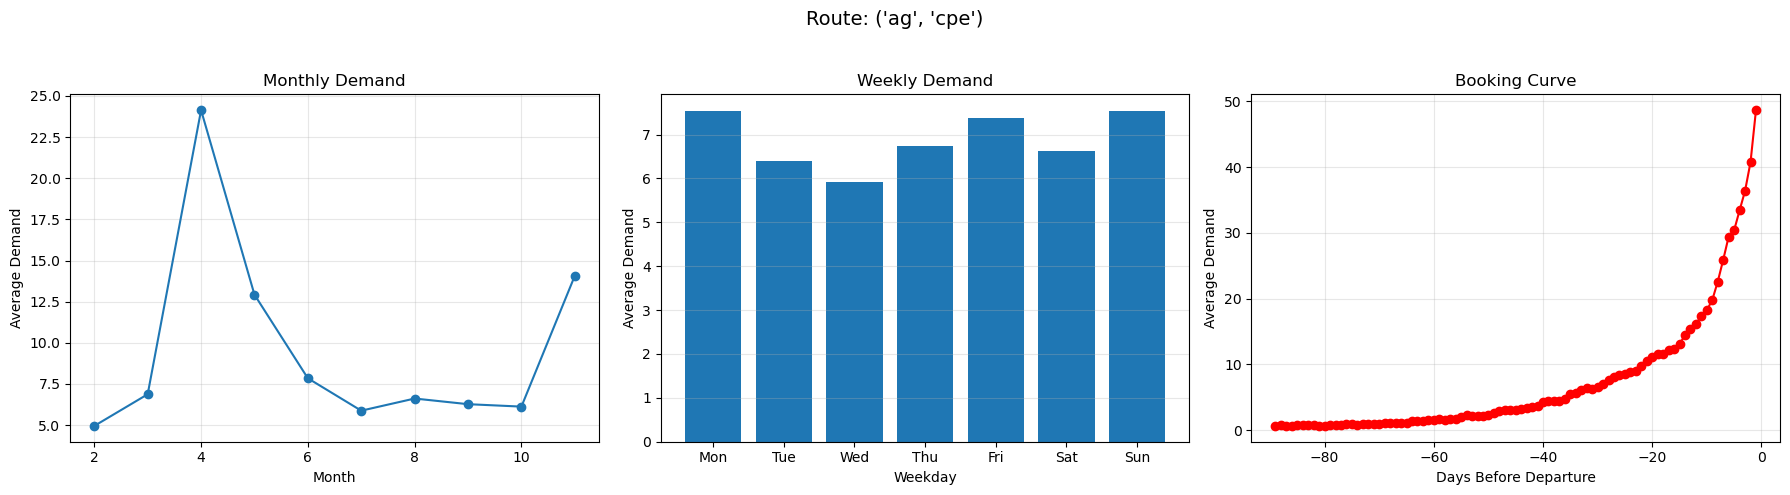

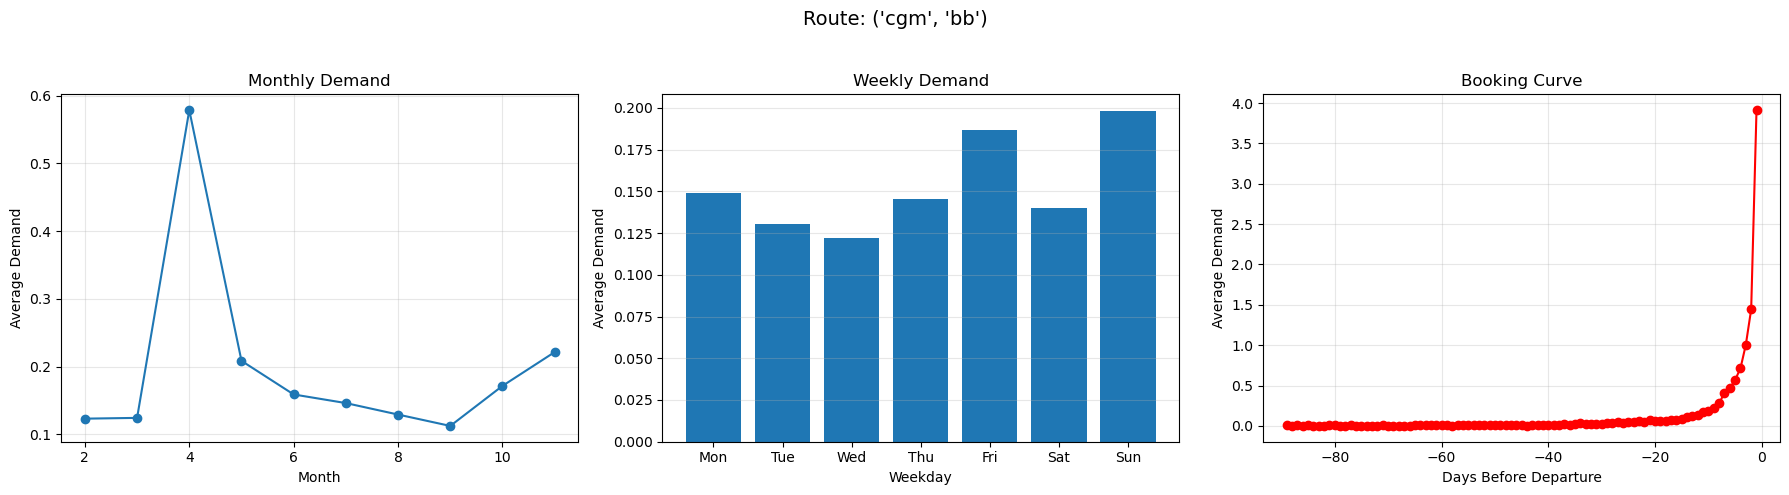

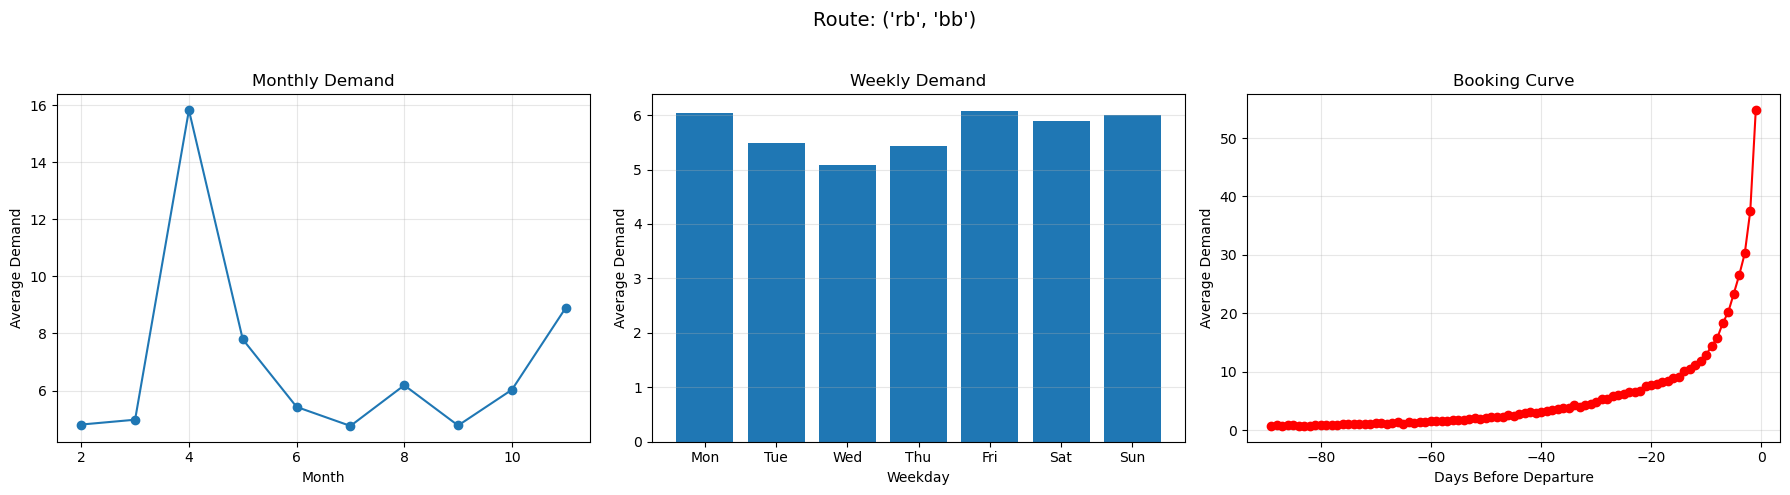

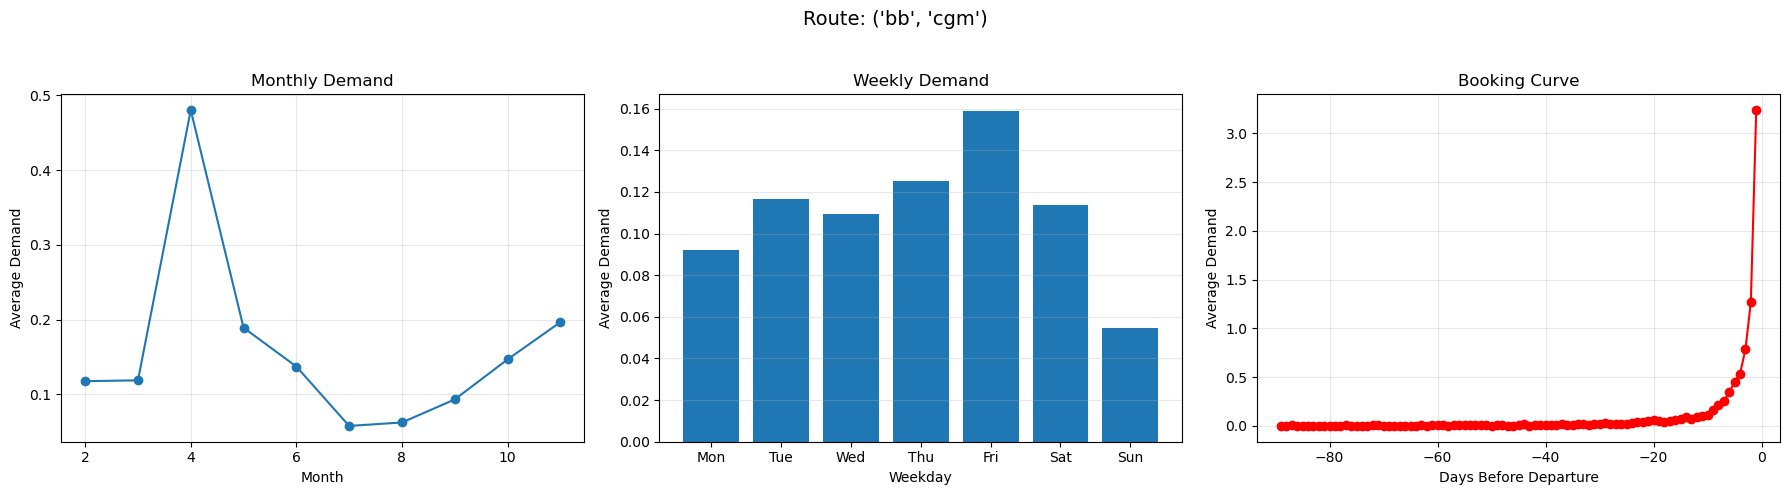

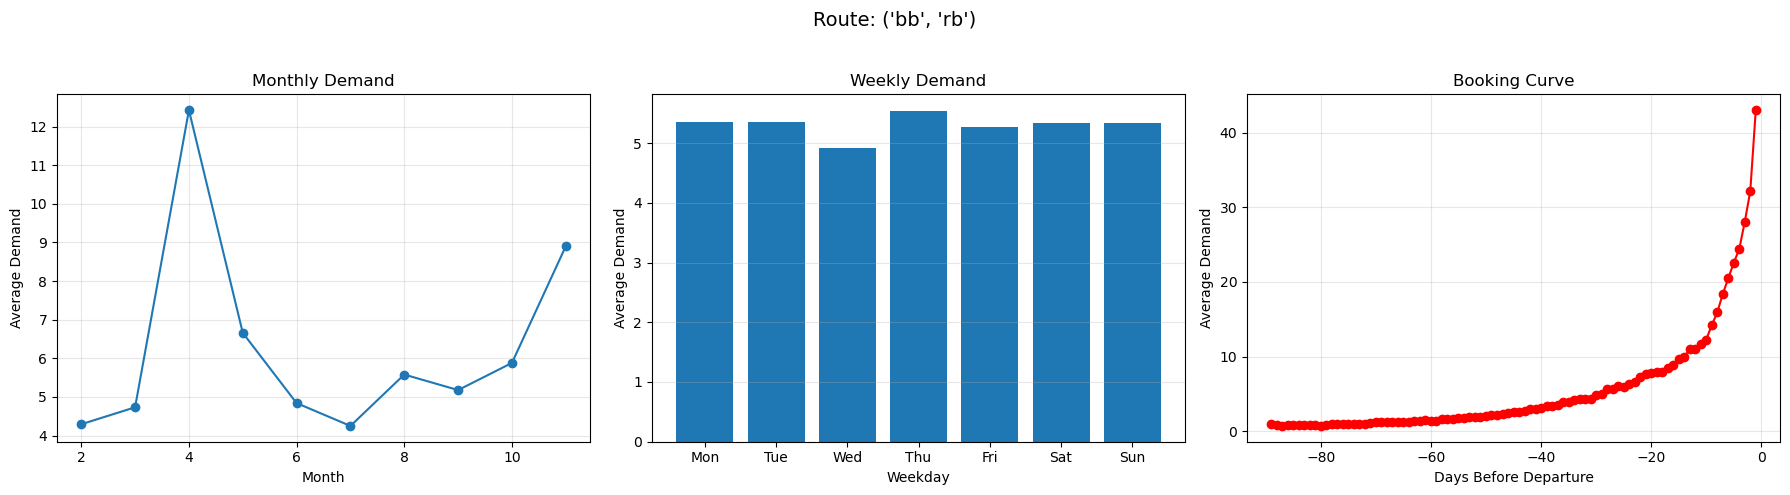

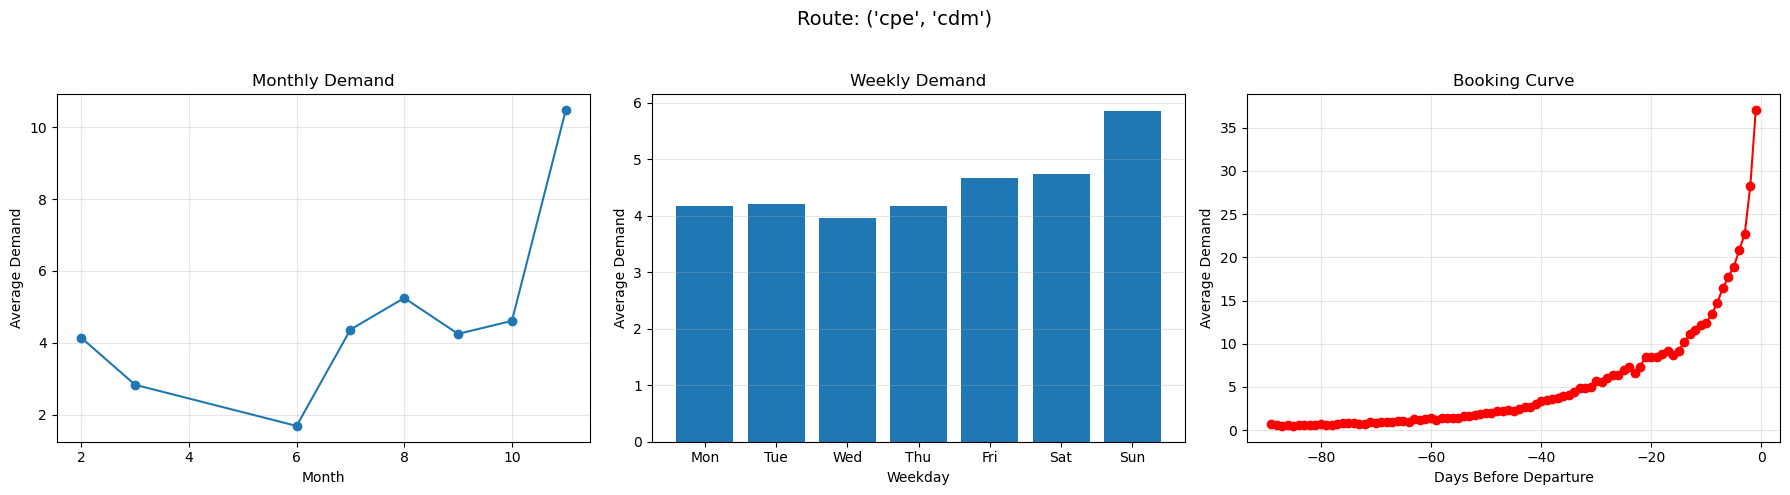

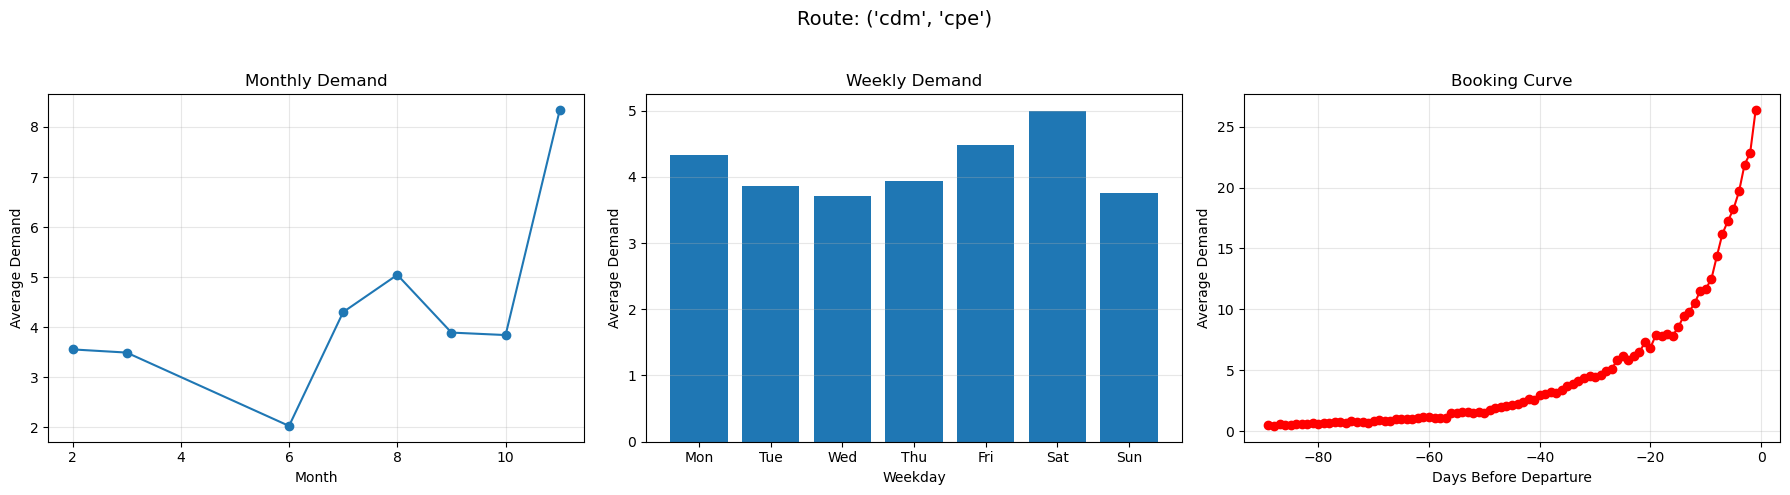

In [13]:
# to compare per-route temporal patterns of the demand

# Compute per-route temporal demand stats
monthly_stats = train.groupby([train['departure_date'].dt.month, 'route'])['demand'].mean().reset_index(name='avg_demand')
weekly_stats = train.groupby(['od_origin_weekday', 'route'])['demand'].mean().reset_index(name='avg_demand')
sale_day_stats = train.groupby(['sale_day_x', 'route'])['demand'].mean().reset_index(name='avg_demand')

for route in train['route'].unique():
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Monthly demand
    ms = monthly_stats[monthly_stats['route'] == route].sort_values('departure_date')
    axs[0].plot(ms['departure_date'], ms['avg_demand'], marker='o')
    axs[0].set_title('Monthly Demand')
    axs[0].set_xlabel('Month')
    axs[0].set_ylabel('Average Demand')
    axs[0].grid(alpha=0.3)

    # Weekly demand
    ws = weekly_stats[weekly_stats['route'] == route].sort_values('od_origin_weekday')
    weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axs[1].bar(ws['od_origin_weekday'], ws['avg_demand'])
    axs[1].set_xticks(np.arange(7))
    axs[1].set_xticklabels(weekday_labels)
    axs[1].set_title('Weekly Demand')
    axs[1].set_xlabel('Weekday')
    axs[1].set_ylabel('Average Demand')
    axs[1].grid(alpha=0.3, axis='y')

    # Booking curve
    sds = sale_day_stats[sale_day_stats['route'] == route].sort_values('sale_day_x')
    axs[2].plot(sds['sale_day_x'], sds['avg_demand'], marker='o', color='red')
    axs[2].set_title('Booking Curve')
    axs[2].set_xlabel('Days Before Departure')
    axs[2].set_ylabel('Average Demand')
    axs[2].grid(alpha=0.3)

    plt.suptitle(f'Route: {route}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [14]:
# to get average travel time insights for each route
avg_travel_time = (
    train
    .groupby('route')['od_travel_time_minutes']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'od_travel_time_minutes': 'average_travel_time_minutes'})
)

display(avg_travel_time.sort_values('average_travel_time_minutes', ascending=False))

,route,average_travel_time_minutes
3,"(cdm, cpe)",290.40
6,"(cpe, cdm)",283.74
2,"(bb, rb)",210.91
7,"(rb, bb)",199.76
5,"(cpe, ag)",151.74
0,"(ag, cpe)",144.98
4,"(cgm, bb)",35.51
1,"(bb, cgm)",33.94


#### Monthly analysis 
The analysis of train ticket demand shows clear and consistent patterns that depend on both the time and the specific route. We see strong seasonal changes, with demand rising around certain months like April/May and November due to holidays. 


#### Weekly analysis
Demand also follows weekly rhythms. On high-traffic routes, peaks are observed on Mondays, Fridays, and Sundays, reflecting commuter and short-trip behavior. In contrast, other lines show higher demand on Saturdays, indicating more leisure-oriented usage.

#### Booking curve

All routes exhibit a strongly right-skewed booking curve, demand remains low through most of the sales window, then surges sharply in the final week before departure, often peaking just before the train departs. This pattern suggests a **large share of late bookers**.

#### Travel Time
There is also significant variation in travel time, ranging from over 5 hours on long-distance routes to just 30–40 minutes on short ones

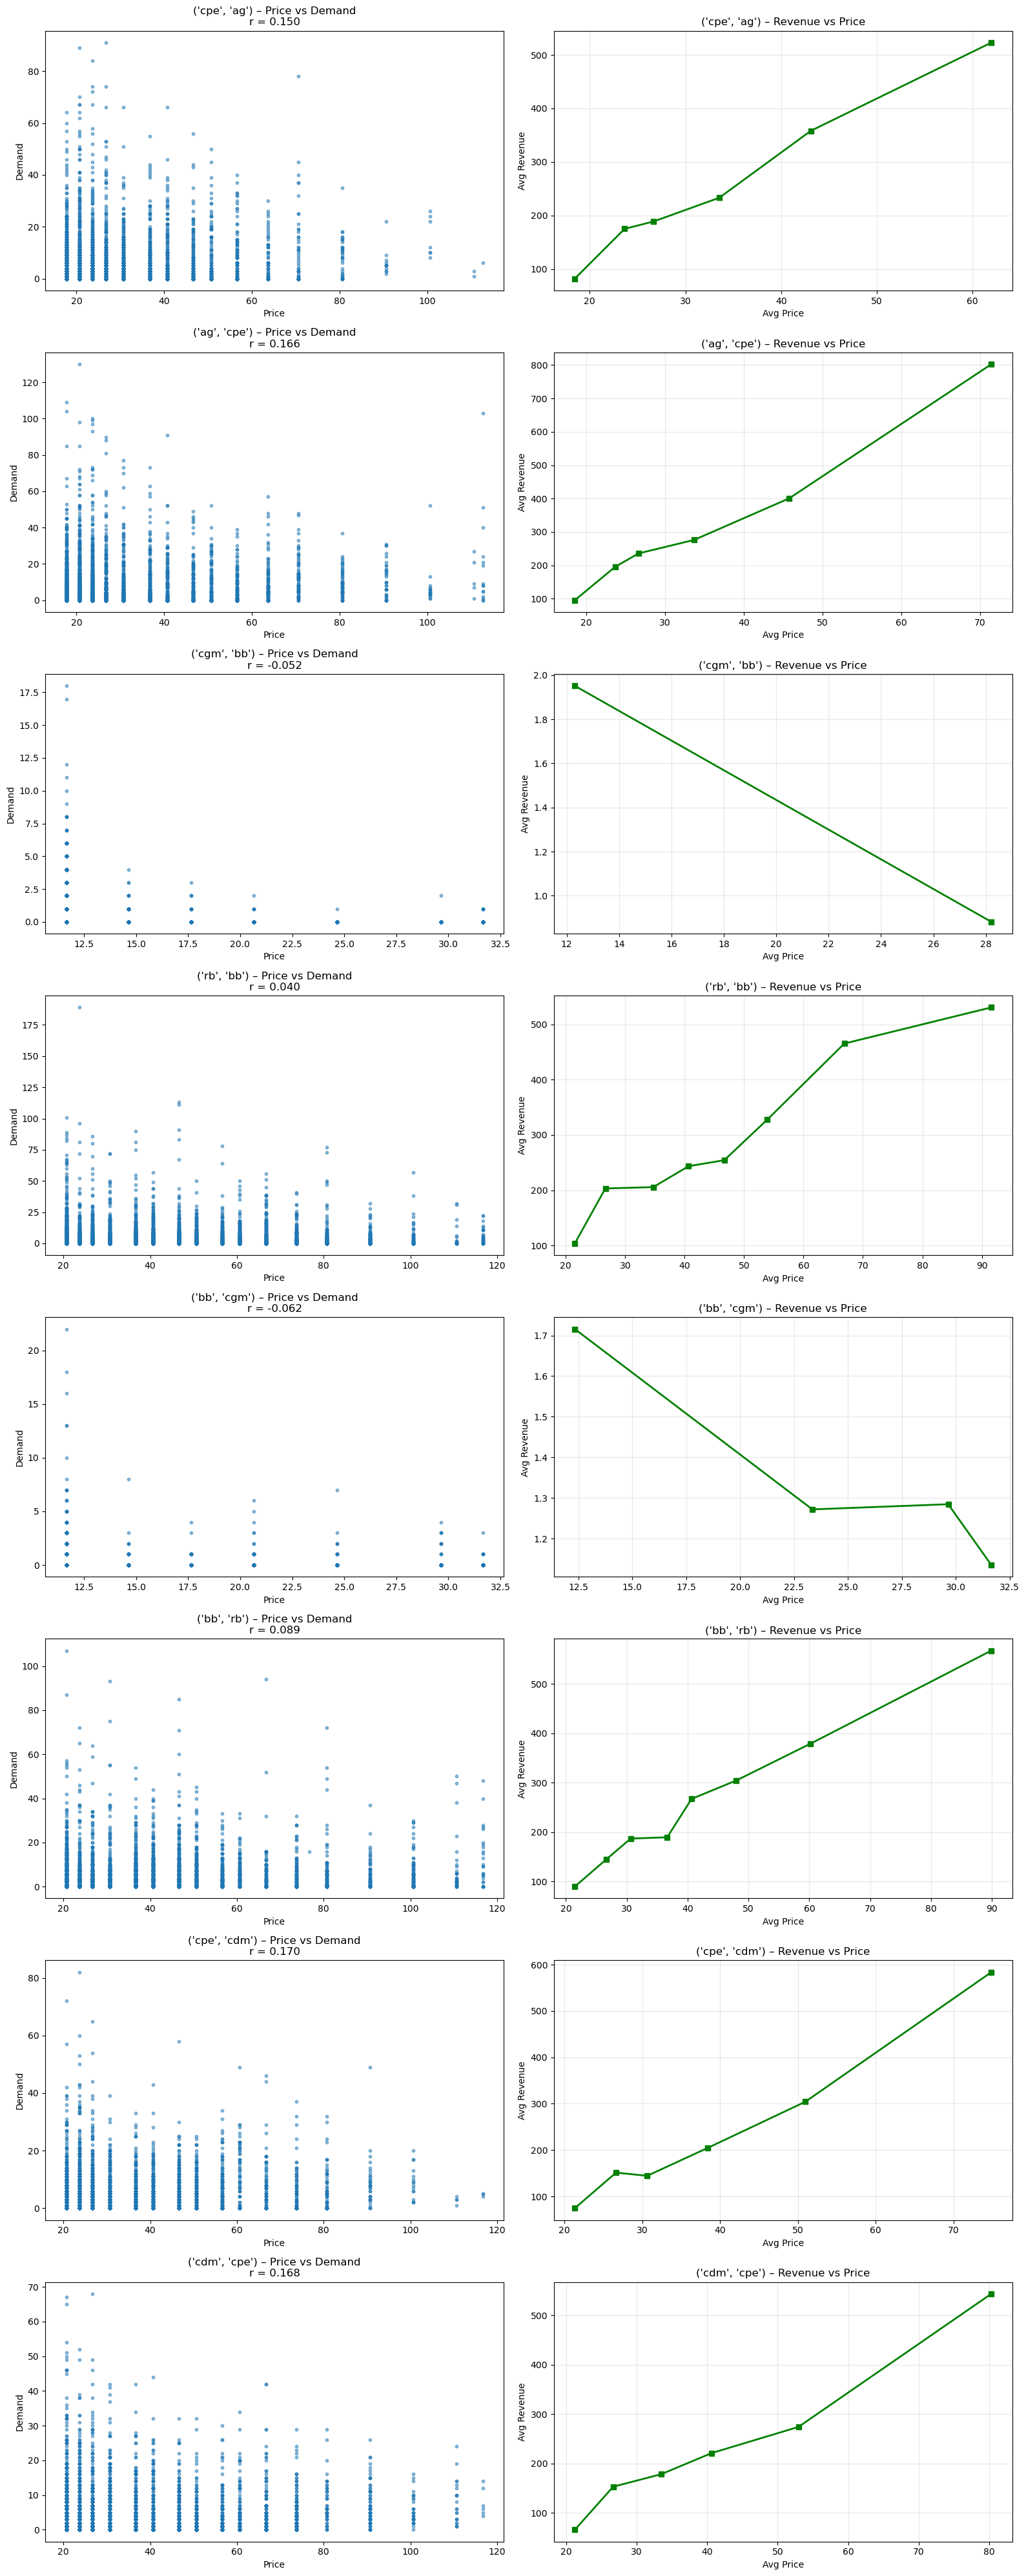

In [21]:
# Create price deciles per route
train['price_decile'] = train.groupby('route')['price'].transform(
    lambda x: pd.qcut(x, 10, labels=False, duplicates='drop')
)

# Compute price-demand correlation per route
correlations = train.groupby('route').apply(
    lambda grp: grp['price'].corr(grp['demand'])
)

# Compute average revenue per price decile and route
train['revenue'] = train['price'] * train['demand']
avg_revenue = train.groupby(['route', 'price_decile'])['revenue'].mean()

# Compute average price per decile and route (for plotting)
avg_price = train.groupby(['route', 'price_decile'])['price'].mean()

# Plot for each route
routes = train['route'].unique()
fig, axes = plt.subplots(len(routes), 2, figsize=(16, 5 * len(routes)))
if len(routes) == 1:
    axes = [axes]

for i, route in enumerate(routes):
    data = train[train['route'] == route]
    sample = data.sample(min(5000, len(data)))
    route_corr = correlations[route]
    route_avg_price = avg_price.loc[route]
    route_avg_revenue = avg_revenue.loc[route]

    ax0 = axes[i][0] if len(routes) > 1 else axes[0]
    ax1 = axes[i][1] if len(routes) > 1 else axes[1]

    # Price vs Demand scatter
    ax0.scatter(sample['price'], sample['demand'], alpha=0.5, s=10)
    ax0.set_title(f'{route} – Price vs Demand\nr = {route_corr:.3f}')
    ax0.set_xlabel('Price')
    ax0.set_ylabel('Demand')

    # Revenue vs Price
    ax1.plot(route_avg_price.values, route_avg_revenue.values,
             marker='s', linewidth=2, markersize=6, color='green')
    ax1.set_title(f'{route} – Revenue vs Price')
    ax1.set_xlabel('Avg Price')
    ax1.set_ylabel('Avg Revenue')
    ax1.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Price vs Demand Scatter
The scatter plots in the first column visualize how demand varies with price across different train routes in the dataset. While there is a general tendency for demand to decrease as prices rise, this relationship is clearly not consistent or strictly linear—there’s considerable scatter for each price level. This variability indicates that, despite the influence of price, other factors related to each route or time period are significantly affecting demand.

### Revenue vs Price
Revenue usually increases with higher prices

### CORRELATION ANALYSIS BETWEEN FEATURES

/usr/local/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


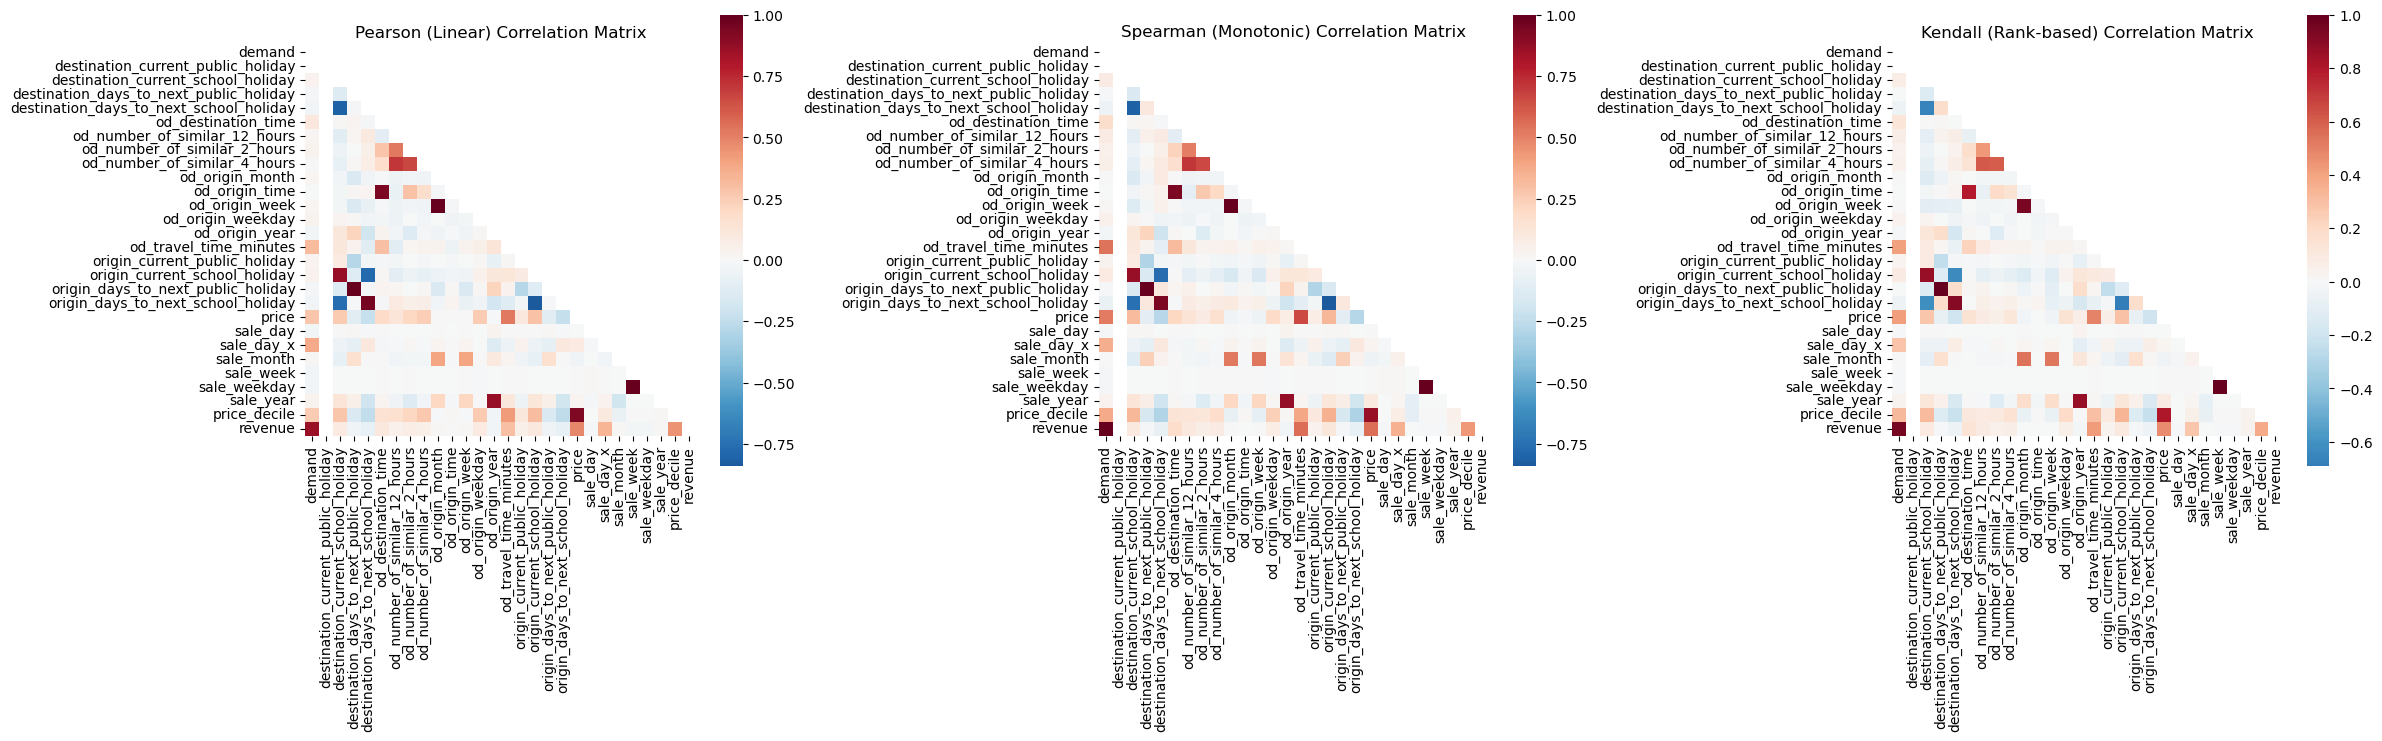

In [22]:
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

pearson_corr = train[numerical_cols].corr(method='pearson')
spearman_corr = train[numerical_cols].corr(method='spearman')
kendall_corr = train[numerical_cols].corr(method='kendall')

# Correlation heatmaps
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

correlations = {'pearson': pearson_corr, 'spearman': spearman_corr, 'kendall': kendall_corr}
methods = ['pearson', 'spearman', 'kendall']
titles = ['Pearson (Linear)', 'Spearman (Monotonic)', 'Kendall (Rank-based)']

for i, (method, title) in enumerate(zip(methods, titles)):
    mask = np.triu(np.ones_like(correlations[method], dtype=bool))
    sns.heatmap(correlations[method], 
               mask=mask,
               annot=False, 
               cmap='RdBu_r',
               center=0,
               square=True,
               cbar_kws={'shrink': 0.8},
               ax=axes[i])
    axes[i].set_title(f'{title} Correlation Matrix')

plt.tight_layout()
plt.show()

Highly correlated features can be removed from the dataset because they are redundant.

### HOLIDAYS ANALYSIS

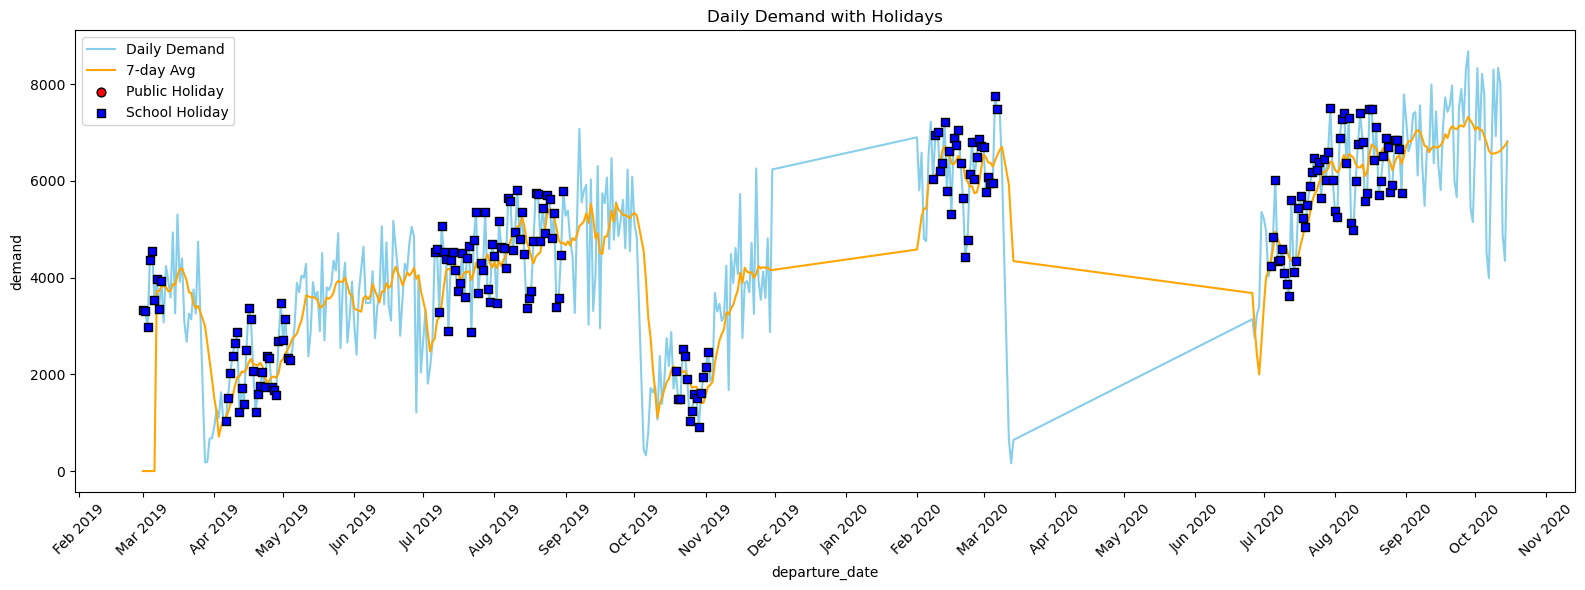

In [23]:
daily = train.groupby('departure_date').agg({
    'demand':'sum',
    'destination_current_public_holiday': 'max',
    'destination_current_school_holiday': 'max'
}).reset_index()

daily['7d_avg'] = daily['demand'].rolling(7).mean().fillna(0)
plt.figure(figsize=(16,6))
sns.lineplot(data=daily, x='departure_date', y='demand', color='skyblue', label='Daily Demand')
sns.lineplot(data=daily, x='departure_date', y='7d_avg', color='orange', label='7-day Avg')
plt.scatter(
    daily[daily['destination_current_public_holiday']==1]['departure_date'],
    daily[daily['destination_current_public_holiday']==1]['demand'],
    color='red', edgecolor='k', label='Public Holiday', s=40, zorder=3)
plt.scatter(
    daily[daily['destination_current_school_holiday']==1]['departure_date'],
    daily[daily['destination_current_school_holiday']==1]['demand'],
    color='blue', edgecolor='k', label='School Holiday', s=40, zorder=3, marker='s')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt_xticks = plt.xticks(rotation=45)
plt.title('Daily Demand with Holidays')
plt.legend(); plt.tight_layout(); plt.show()


There is a strong, direct relationship between holidays and demand peaks. School and public holidays act as demand multipliers and will be key to building robust forecast features.